# TP02 - Fundamentals of Artificial Intelligence


## Dataset

The dataset used for this project is a dataset from Kaggle that includes key tourism and economic indicators for over 200 countries between the years of 1999 and 2023.
Source Link to the dataset: https://www.kaggle.com/datasets/bushraqurban/tourism-and-economic-impact?select=world_tourism_economy_data.csv

### Description

### Dataset Metadata
Dataset name: world_tourism_economy_data.csv

Dataset strucure:
- country: The name of the country for which the data is reported.
- country_code: ISO country code (e.g., USA).
- year: The year for which the data is reported (1999-2023).
- tourism_receipts: Income from international tourism (in current US dollars).
- tourism_arrivals: Number of international tourists arriving in the country.
- tourism_exports: Share of exports derived from international tourism receipts (%).
- tourism_departures: Number of residents traveling abroad for tourism.
- tourism_expenditures: Spending by international tourists (in current US dollars).
- gdp: Gross Domestic Product of the country (in current US dollars).
- inflation: Annual percentage change in the price level (inflation).
- unemployment: Percentage of the labor force that is unemployed but actively seeking work.

Dataset row example:
`Portugal,PRT,2019,24592000000.0,17283000.0,23.4554217784929,3100000.0,6.6236680370026,240115970063.019,0.338178410046034,6.464 `

## Initial Imports and file read

In [4]:
%pip install pandas scikit-learn mlxtend matplotlib

/Users/ricardofernandes/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Loads the dataset
file_path = 'world_tourism_economy_data.csv'  # Replace with the actual path
tourism_data = pd.read_csv(file_path)

/Users/ricardofernandes/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Prepararion


In [8]:
# Create a new feature: Tourism GDP Percentage
# Assuming 'tourism_receipts' is equivalent to 'Tourism GDP'
tourism_data['Tourism_GDP_Percentage'] = (tourism_data['tourism_receipts'] / tourism_data['gdp']) * 100



# Handle missing values (drop rows with missing required columns)
tourism_data = tourism_data.dropna(subset=['tourism_receipts', 'gdp', 'tourism_arrivals'])

# Create a binary target variable: High Tourism Impact
threshold = 5  # Adjust threshold as needed
tourism_data['High_Tourism_Impact'] =  1 if (tourism_data['Tourism_GDP_Percentage'] > threshold) else 0



# Inspect the dataset
# print(tourism_data.head())

/Users/ricardofernandes/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Decision Tree Classification

/Users/ricardofernandes/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Decision Tree Accuracy: 0.88


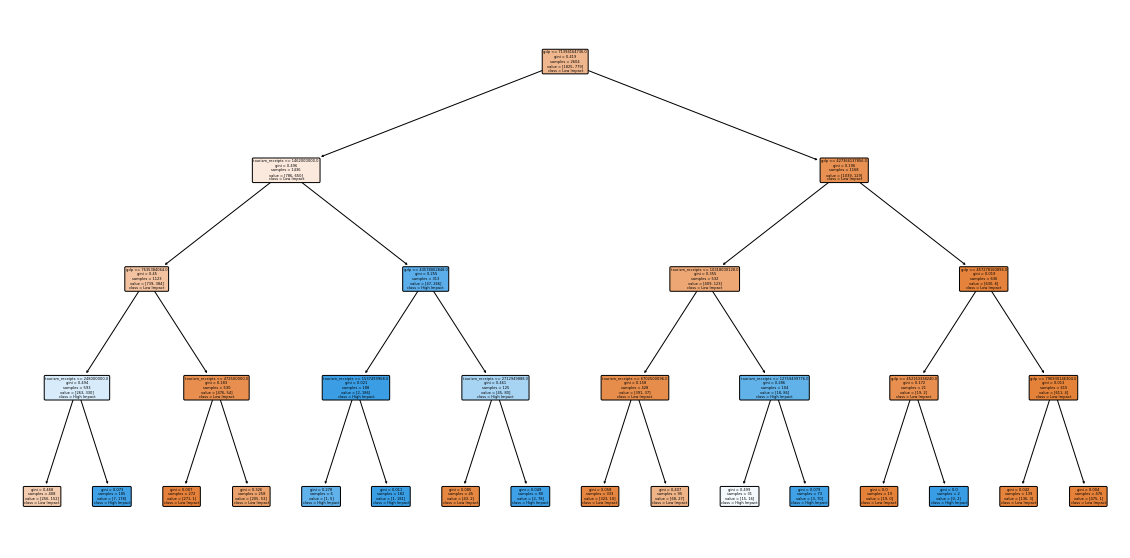

In [ ]:
# Prepare features and target
X = tourism_data[['tourism_arrivals', 'tourism_receipts', 'gdp']]  # Relevant columns
y = tourism_data['High_Tourism_Impact']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1234, max_depth=4)
clf_model = clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_model, filled=True, rounded=True, feature_names=X.columns, class_names=['Low Impact', 'High Impact'])
plt.show()

## Clustering

/Users/ricardofernandes/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


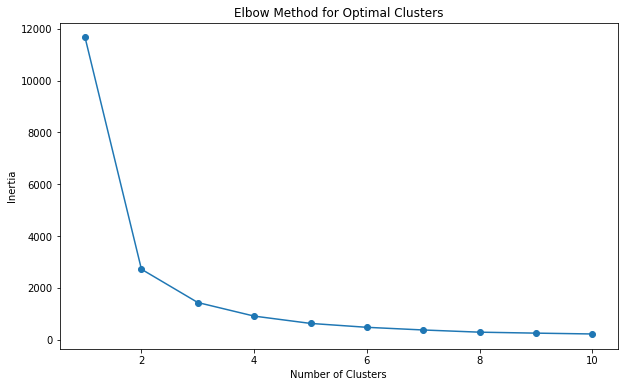

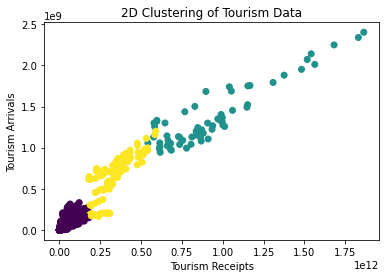

In [ ]:
# Select features for clustering
features = tourism_data[['tourism_arrivals', 'tourism_receipts', 'gdp']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
tourism_data['Cluster'] = clusters

# Visualize the clusters in 2D
plt.scatter(features['tourism_receipts'], features['tourism_arrivals'], c=clusters, cmap='viridis', marker='o')
plt.xlabel('Tourism Receipts')
plt.ylabel('Tourism Arrivals')
plt.title('2D Clustering of Tourism Data')
plt.show()

## Association Rule Mining

In [ ]:
# Prepare the data for association rule mining
#print(tourism_data)
transactions = tourism_data[['country', 'High_Tourism_Impact', 'year']]
print(transactions.head())


# Apply Apriori

def predictYearImpact(min_support=0.5, min_confidence=0.5):

    tra = transactions[(transactions['year'] > 2015)]
    # Prepare data for Apriori by pivoting
    ds_pivot = pd.pivot(data=tra, index='year', columns='country', values='High_Tourism_Impact').fillna(0)
    print(ds_pivot)

    # Run Apriori algorithm
    freq_itemsets = apriori(ds_pivot, min_support=min_support, use_colnames=True)
    print(freq_itemsets)
    
    rules = association_rules(freq_itemsets, metric="confidence", min_threshold=min_confidence)

    if rules.empty:
        return f"No strong rules found to predict tourism impact."

    # Analyze rules to find those predicting High_Tourism_Impact
    high_impact_rules = rules[rules['consequents'].apply(lambda x: 'High_Tourism_Impact' in x)]

    if not high_impact_rules.empty:
        best_rule = high_impact_rules.iloc[0]
        return (
            f"Might have high tourism impact based on patterns in the data. "
            f"(Support: {best_rule['support']:.2f}, Confidence: {best_rule['confidence']:.2f})"
        )

    # Default case: No strong patterns found
    return f"No strong indication of high tourism impact."

prediction = predictYearImpact()
print(prediction)

/Users/ricardofernandes/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/homebrew/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                       country  High_Tourism_Impact  year
0                        Aruba                 True  1999
1  Africa Eastern and Southern                False  1999
3   Africa Western and Central                False  1999
4                       Angola                False  1999
5                      Albania                 True  1999
country Africa Eastern and Southern Africa Western and Central  Albania  \
year                                                                      
2016                          False                      False     True   
2017                          False                          0     True   
2018                          False                          0     True   
2019                          False                          0     True   
2020                              0                          0     True   

country  Algeria American Samoa Andorra Angola  Antigua and Barbuda  \
year                                                   